In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/content/titanic (1).csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#There a 12 columns in the data set 2 categorical and `10 numerical
#Survive is Response
#Missing Value are in the column Age and cabin.
#Ticket data is useless for calculating the survival rate

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#This dataset contain 891 rows and 12 columns
#This dataset contain 3 datatype column: float64(2), int64(5) and object(5)
#The columns that have NaN values are Age(177), Cabin(687) and Embarked(2)
#The memory usage of the above dataset is 83.7+KB

In [9]:
df.shape

(891, 12)

In [10]:
df.isna().sum() #isna() is use to detect missing values and sum() is to add all number of missing values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Survived', ylabel='count'>

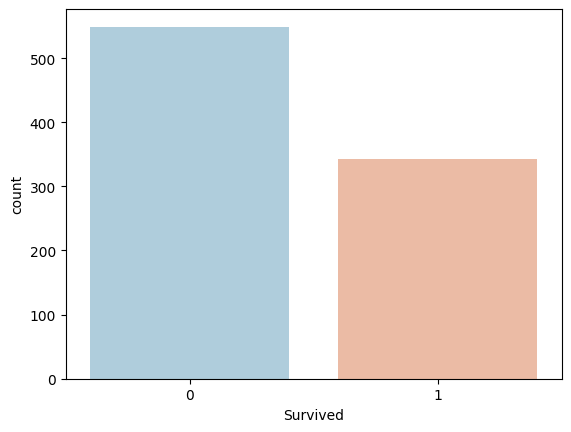

In [11]:
#The number of people who survived is less than who who couldn't survived
sns.countplot(data=df, x="Survived", palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

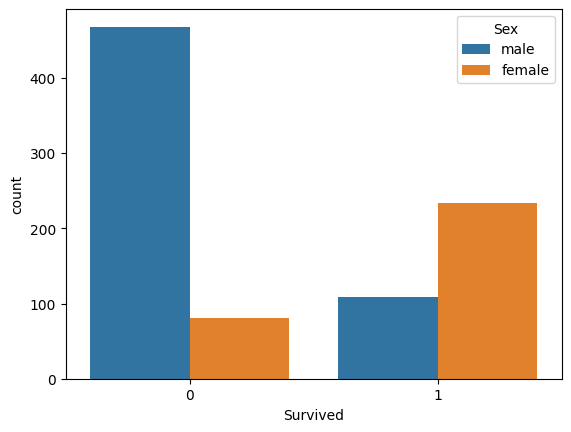

In [12]:
#This plot shows the count of male's and female's who survived or not.
#plot shows more number of female's have survived
#plot shows more number of male's have died
sns.countplot(data=df, x="Survived", hue="Sex")

<Axes: xlabel='Survived', ylabel='count'>

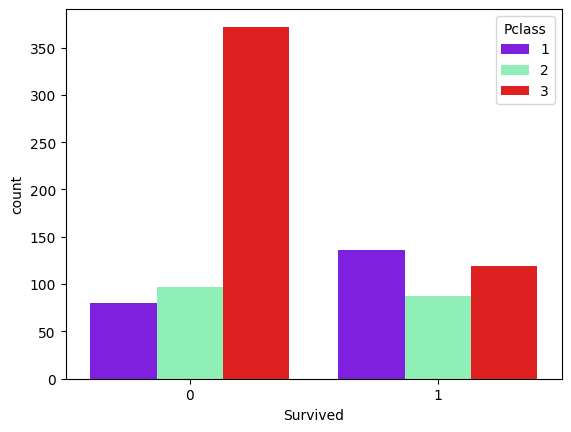

In [13]:
#This plot shows the count of Pclass passenger who survived or not.
sns.countplot(data=df, x="Survived", hue="Pclass", palette="rainbow")

In [14]:
df.describe()#gives statistcal summary of numeric data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
#in age colume mean and median have no variance
# if you check mean age is greater than median i.e it shows low variance, so that is my right side skewness
#Fare is very skewed they show right side skewness

<Axes: xlabel='Fare', ylabel='Density'>

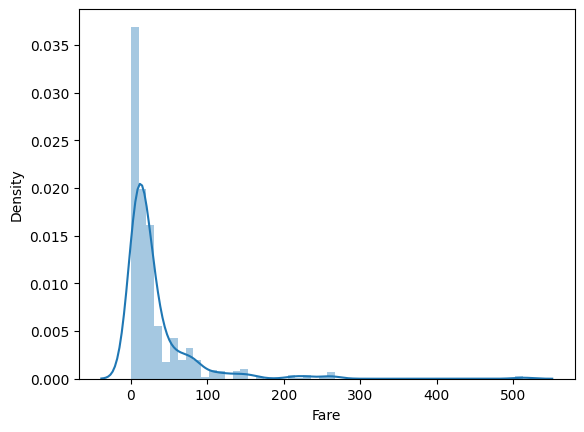

In [16]:
sns.distplot(df["Fare"])

<Axes: >

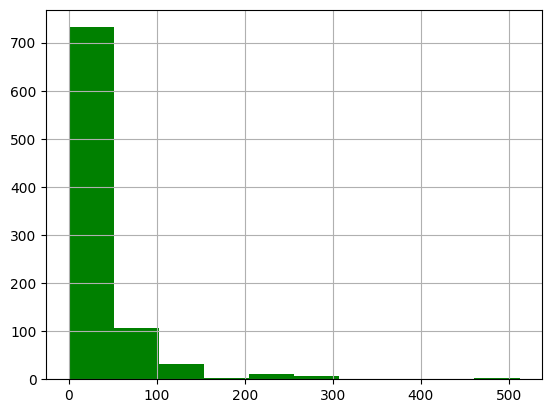

In [17]:
df["Fare"].hist(color="green")

In [18]:
#the outlier is on the x axis between 200-300 and 450-500

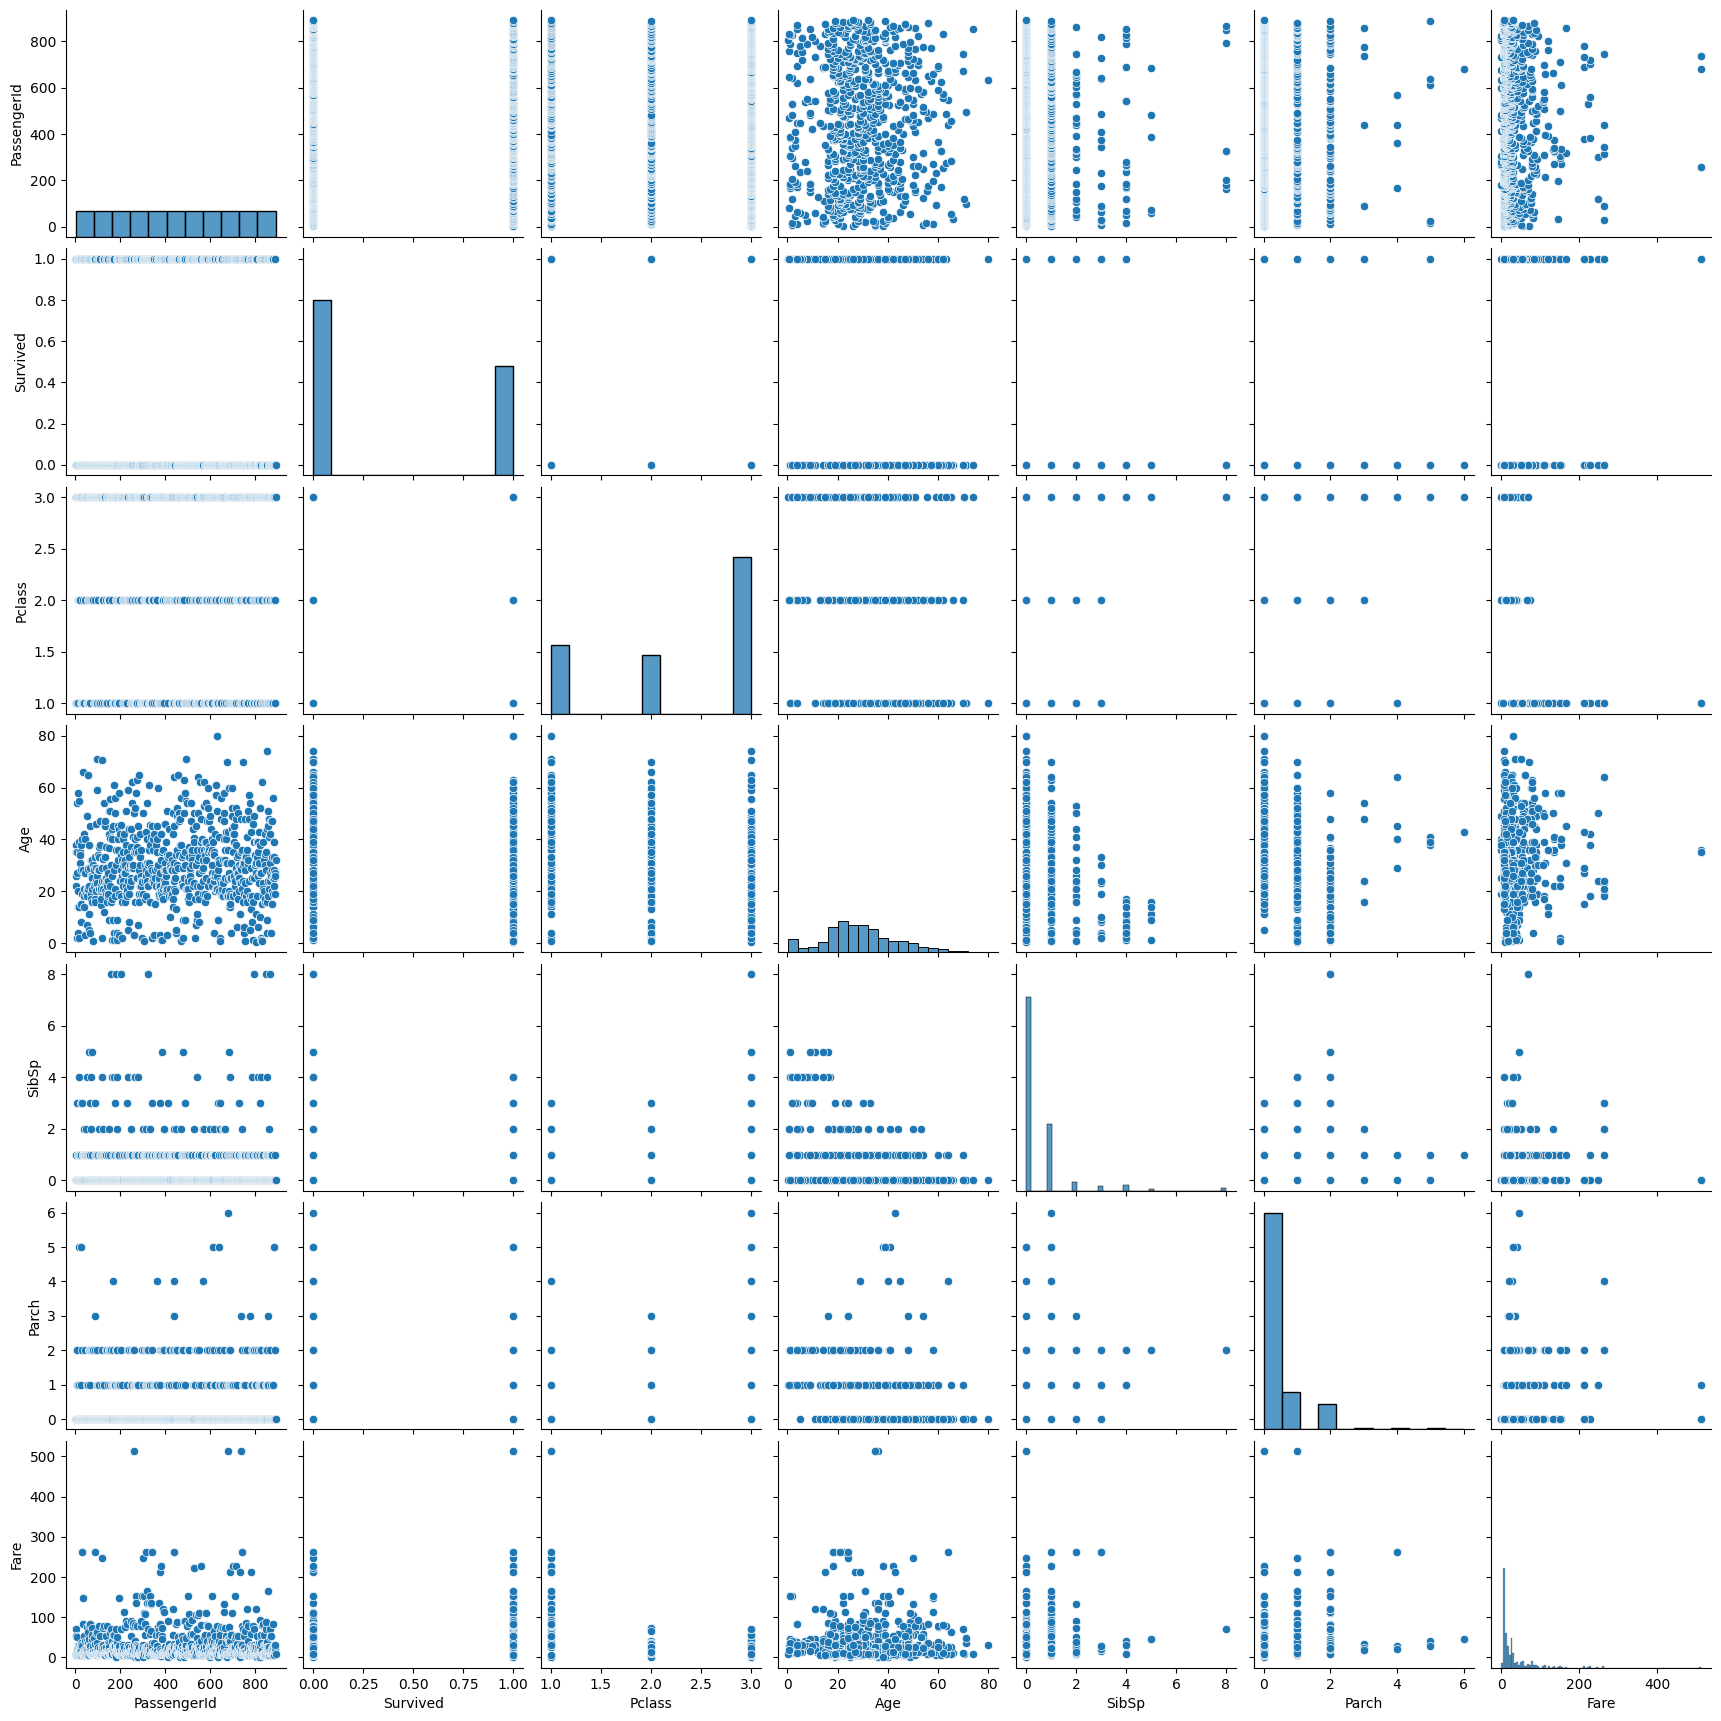

In [19]:
sns.pairplot(df)

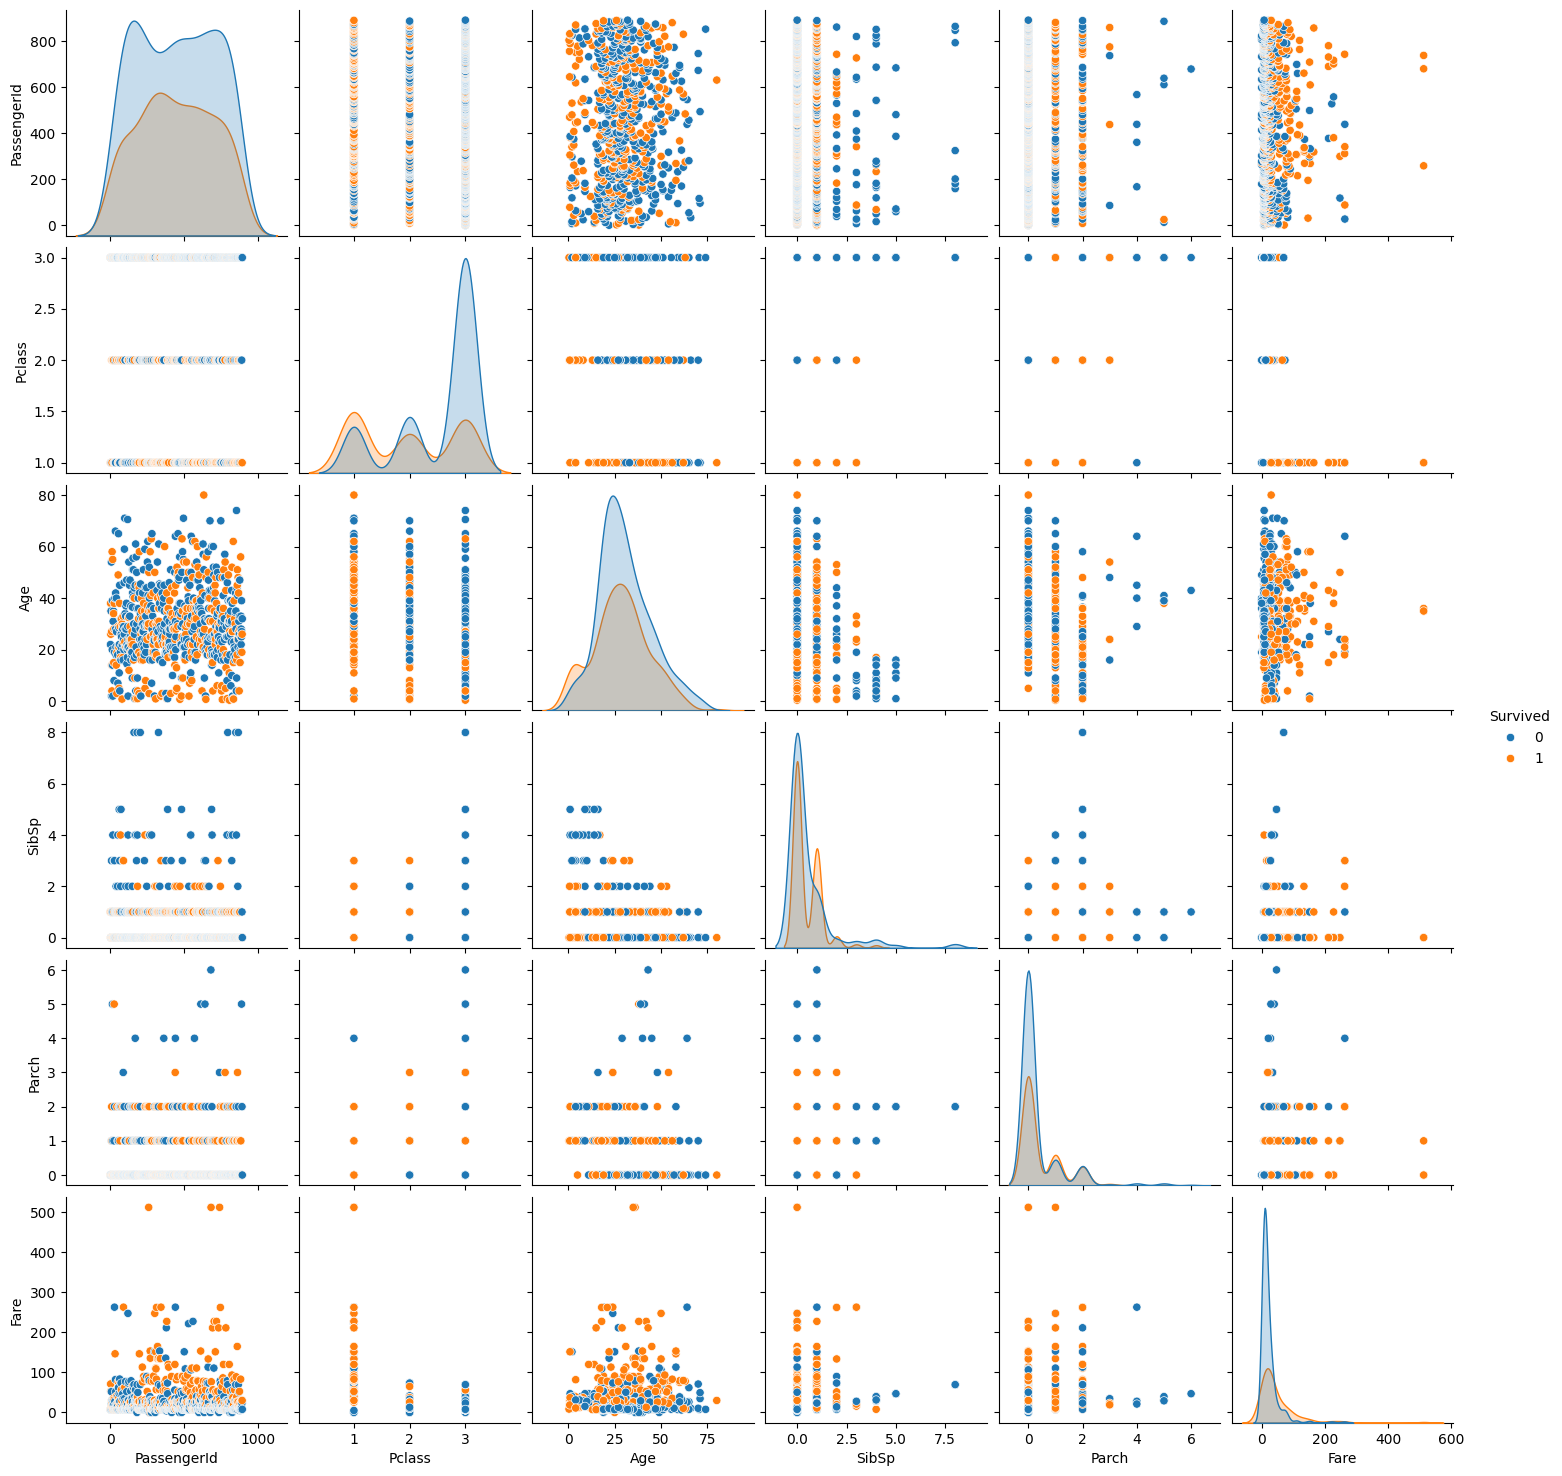

In [20]:
#in pclass 3 class people survived more.
#columns showing positive skwed realtionship with each other
sns.pairplot(df, hue="Survived")

# **Data cleaning and Processing**

In [21]:
df.isna().sum()#866

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

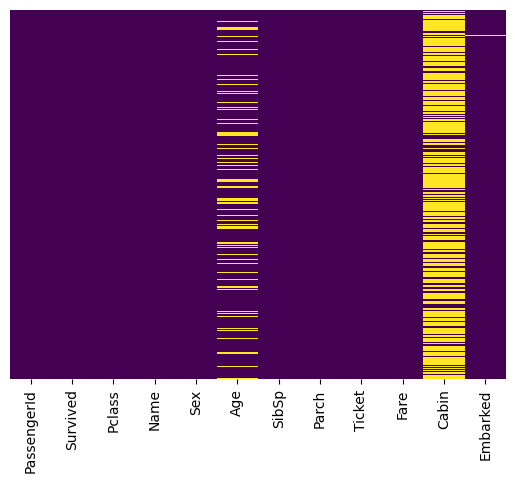

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis") # this heat map shows the NaN values

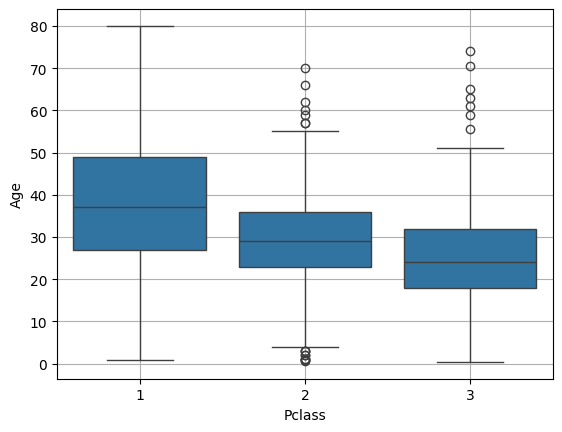

In [23]:
sns.boxplot(x="Pclass", y="Age", data=df)
plt.grid(True)

In [24]:
#The plot shows in 1st class there are no outliers .
#in 2nd class the outliers are below the age of 2 and above the age of 55.
#in 3rd class thwe outliers are above the of 53


In [25]:
def fillage(cols):
  age=cols[0]
  pclass=cols[1]

  if (pd.isnull(age)):
    if(pclass==1):
      return 38
    elif(pclass==2):
      return 29
    else:
      return 24
  else:
    return age

In [26]:
df["Age"]=df[["Age","Pclass"]].apply(fillage, axis=1)

<Axes: >

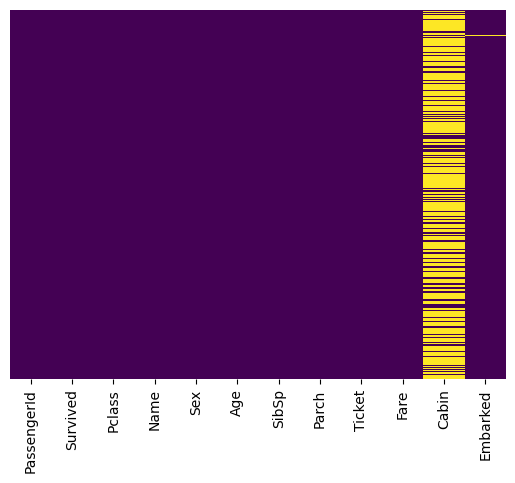

In [27]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis") # this heat map shows age columsns nan values are filled by using user-defined function an d

In [28]:
df.drop("Cabin",axis=1,inplace=True)

<Axes: >

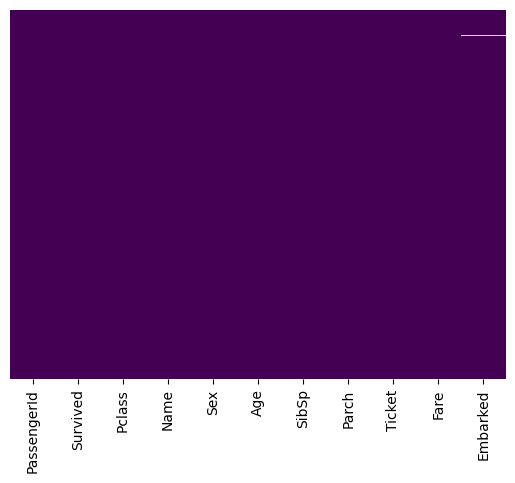

In [29]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis") # this heat map shows the cabin column is drop

In [30]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [31]:
df.dropna(inplace=True)

In [32]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

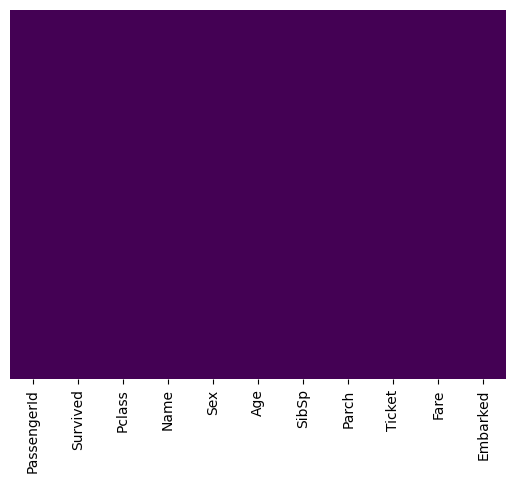

In [33]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis") # this heat map shows no NaN values

In [34]:
df.info()#we didnot find any kind of erors

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [35]:
df.drop(["PassengerId","Ticket","Name"], axis=1, inplace=True)

# **Data Pre-Processing for Model Builing**

In [36]:
x = df.iloc[:,1: ]#Dataframe
#1 for except 1st column

y = df.iloc[:,0] #series

In [37]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,24.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [38]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [39]:
x.Sex.value_counts()

,count
Sex,
male,577
female,312


In [40]:
x.Embarked.value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [41]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
x[["Sex","Embarked"]]=oe.fit_transform(x[["Sex","Embarked"]])

In [42]:
#OrdinalEncoder make categorical data into numerical data
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,2.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,2.0
3,1,0.0,35.0,1,0,53.1000,2.0
4,3,1.0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1.0,27.0,0,0,13.0000,2.0
887,1,0.0,19.0,0,0,30.0000,2.0
888,3,0.0,24.0,1,2,23.4500,2.0
889,1,1.0,26.0,0,0,30.0000,0.0


In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

# **Model Creation**

In [44]:
## Logistic Regression ##

In [45]:
#initialize the model
from sklearn.linear_model import LogisticRegression
#Create the model
logreg=LogisticRegression()
#Train the model
logreg.fit(xtrain,ytrain)
#Make Prediction
ypred=logreg.predict(xtest)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
print(f"Accuracy: {ac}\n{cm}\n{cr}")

Accuracy: 0.8426966292134831
[[144  22]
 [ 20  81]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       166
           1       0.79      0.80      0.79       101

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [47]:
train = logreg.score(xtrain,ytrain)
test = logreg.score(xtest,ytest)
print(train)
print(test)

0.7909967845659164
0.8426966292134831


In [48]:
y.value_counts()

,count
Survived,
0,549
1,340


In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1, stratify=y)

In [50]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [51]:
ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
print(f"Accuracy: {ac}\n{cm}\n{cr}")

Accuracy: 0.8052434456928839
[[141  24]
 [ 28  74]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       165
           1       0.76      0.73      0.74       102

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



In [52]:
train = logreg.score(xtrain,ytrain)
test = logreg.score(xtest,ytest)
print(train)
print(test)

0.8038585209003215
0.8052434456928839


## random forest classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
# Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,       # number of trees
    random_state=42
)

# Train the model
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [57]:
y_pred_rf = rf_model.predict(xtest)

In [58]:
# Accuracy
print("Accuracy:", accuracy_score(ytest, y_pred_rf))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(ytest, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:\n")
print(confusion_matrix(ytest, y_pred_rf))

Accuracy: 0.8202247191011236

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       165
           1       0.78      0.75      0.76       102

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267


Confusion Matrix:

[[143  22]
 [ 26  76]]


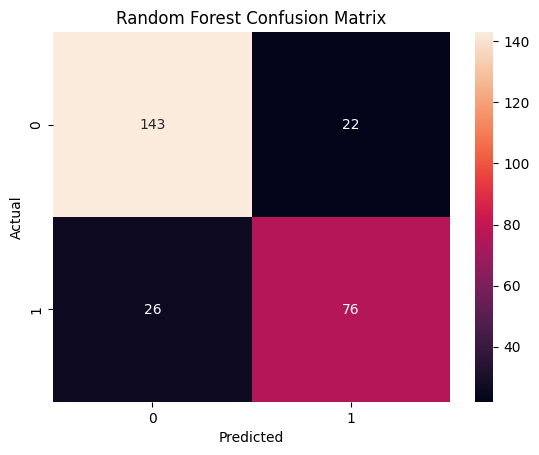

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(ytest, y_pred_rf)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

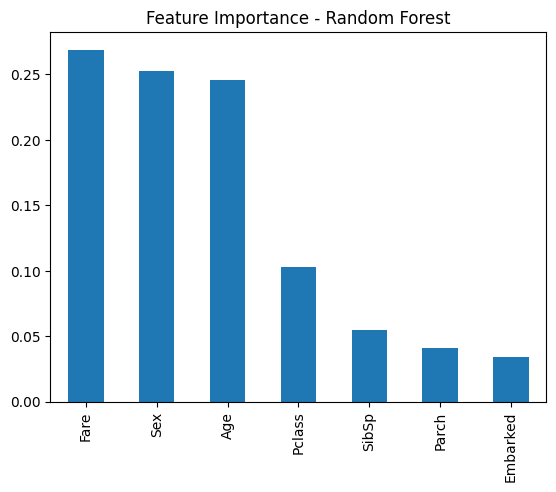

In [63]:
# optional ( but strong feature)
import pandas as pd

feature_importance = pd.Series(rf_model.feature_importances_, index=xtrain.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.show()